<a href="https://colab.research.google.com/github/arodcru/arodcru/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_ATIVIDADE_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#CONECTANDO NO BANCO DE BADOS
import sqlite3

#CONECTANDO AO PANDAS
import pandas as pd


#CRIANDO UM BANCO DE DADOS
conexao = sqlite3.connect('vendas.db')

#CRIANDO O CURSOR
cursor = conexao.cursor()



In [7]:
#CRIANDO A TABELA SEM DADOS
cursor.execute("""
  CREATE TABLE vendas (
   id_vendas INTEGER PRIMARY KEY AUTOINCREMENT,
   data_vendas DATE,
   produto TEXT,
   categoria TEXT,
   valor_vendas REAL
  )
""")

In [8]:
#INSERINDO DADOS NA TABELA VENDAS
cursor.execute("""
  INSERT INTO vendas ( data_vendas,produto, categoria, valor_vendas ) VALUES
    ('2025-08-24','Produto A','Eletronico', 1500.00),
    ('2025-08-15','Produto B','Roupas', 50.00),
    ('2025-08-25','Produto C','Eletronico', 1500.00),
    ('2025-08-15','Produto D','Livros', 200.00),
    ('2025-08-10','Produto E','Roupas', 100.00),
    ('2025-08-08','Produto F','Eletronico', 1500.00),
    ('2025-05-24','Produto G','livros', 150.00),
    ('2025-02-20','Produto H','Roupas', 180.00),
    ('2025-01-15','Produto I','Livros', 100.00);

""")

In [9]:
#CONFIRMAR A MUDANÇA
conexao.commit()

In [13]:
# LENDO A TABELA  PARA O PANDAS
df = pd.read_sql("SELECT * FROM vendas", conexao)
print(df)


   id_vendas data_vendas    produto   categoria  valor_vendas
0          1  2025-08-24  Produto A  Eletronico        1500.0
1          2  2025-08-15  Produto B      Roupas          50.0
2          3  2025-08-25  Produto C  Eletronico        1500.0
3          4  2025-08-15  Produto D      Livros         200.0
4          5  2025-08-10  Produto E      Roupas         100.0
5          6  2025-08-08  Produto F  Eletronico        1500.0
6          7  2025-05-24  Produto G      livros         150.0
7          8  2025-02-20  Produto H      Roupas         180.0
8          9  2025-01-15  Produto I      Livros         100.0


In [14]:
df['valor_vendas'].sum()


np.float64(5280.0)

In [15]:
df['valor_vendas'].mean()

np.float64(586.6666666666666)

In [16]:
df.groupby('categoria')['valor_vendas'].sum()

,valor_vendas
categoria,
Eletronico,4500.0
Livros,300.0
Roupas,330.0
livros,150.0


In [18]:
df['data_vendas'] = pd.to_datetime(df['data_vendas'])

# Vendas por mês
vendas_por_mes = df.groupby(df['data_vendas'].dt.to_period('M'))['valor_vendas'].sum()

,valor_vendas
data_vendas,
2025-01,100.0
2025-02,180.0
2025-05,150.0
2025-08,4850.0


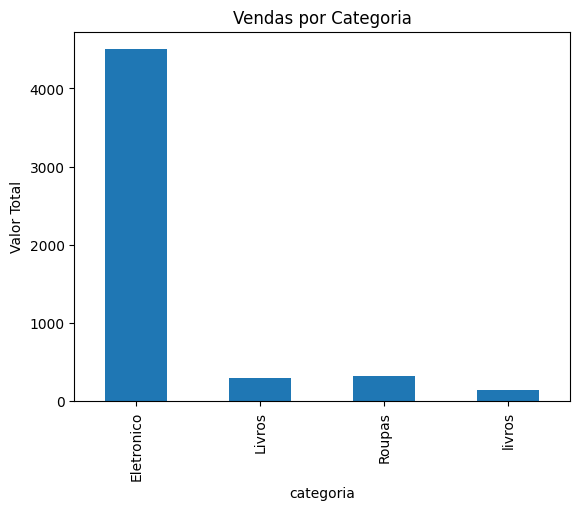

In [22]:
import matplotlib.pyplot as plt

# Vendas por categoria
df.groupby('categoria')['valor_vendas'].sum().plot(kind='bar')
plt.title("Vendas por Categoria")
plt.ylabel("Valor Total")
plt.show()

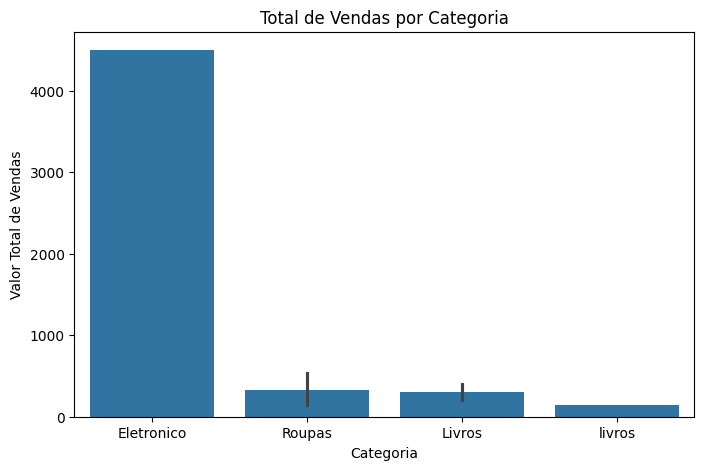

In [23]:
import seaborn as sns
plt.figure(figsize=(8,5))  # Define o tamanho do gráfico
sns.barplot(data=df, x="categoria", y="valor_vendas", estimator=sum)
plt.title("Total de Vendas por Categoria")  # Título
plt.xlabel("Categoria")                     # Eixo X
plt.ylabel("Valor Total de Vendas")         # Eixo Y
plt.show()